0: Burpees
1: Medicine Ball
2: armraise
3: boso
4: bosopushup
5: boxing
6: chair
7: curl
8: cycling
9: dips
10: flix
11: freestyle
12: hammerthrows
13: highraise
14: kicking
15: onelegdown
16: plank
17: punchball
18: pushups
19: ridgeplunges
20: running
21: scooter
22: sideside
23: sidestretch
24: singlelegright
25: split
26: squat
27: step
28: throws
29: vshiftswift
30: weights

In [1]:
#importing all required packages

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.preprocessing import RobustScaler
import time
import pickle
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading csv file for the filtered data
columns = ["SubjectID","Timestamp(microseconds)","AccelX(g)_leg","AccelY(g)_leg","AccelZ(g)_leg","GyroX(¬∞/s)_leg","GyroY(¬∞/s)_leg","GyroZ(¬∞/s)_leg","AccelX(g)_hand","AccelY(g)_hand","AccelZ(g)_hand","GyroX(¬∞/s)_hand","GyroY(¬∞/s)_hand","GyroZ(¬∞/s)_hand","AccelX(g)_chest","AccelY(g)_chest","AccelZ(g)_chest","Sample(V)","Activity_Label"]
df = pd.read_csv("PDdata_31activities.csv", header=0, names = columns, dtype={'SubjectID': str})

In [3]:
df

SubjectID  Timestamp(microseconds)  AccelX(g)_leg  AccelY(g)_leg  \
0              1         1613575026007263      -0.621653       0.469306   
1              1         1613575026023239      -0.621653       0.435859   
2              1         1613575026039215      -0.622751       0.419989   
3              1         1613575026055191      -0.625437       0.418280   
4              1         1613575026071167      -0.621164       0.406073   
...          ...                      ...            ...            ...   
367976         8         1614295140928869      -1.160723      -0.046326   
367977         8         1614295140944846      -1.077592      -0.114809   
367978         8         1614295140960823      -1.013016      -0.075624   
367979         8         1614295140976800      -0.677317       0.022278   
367980         8         1614295140992776      -0.248234       0.029603   

        AccelZ(g)_leg  GyroX(¬∞/s)_leg  GyroY(¬∞/s)_leg  GyroZ(¬∞/s)_leg  \
0           -0.509712       -24.017700        13.641566       -24.750134   
1           -0.520333       -26.276036        15.899901       -25.665675   
2           -0.560128       -25.848783        16.021973       -24.444953   
3           -0.545846       -22.064546        14.923323       -18.829633   
4           -0.505074        -9.430076        11.810483        -9.430076   
...               ...              ...              ...              ...   
367976       0.274479        33.417258       -35.919738       -34.149691   
367977       0.132265        28.168154       -10.772869       -33.173114   
367978      -0.015930        -3.082322         4.425116       -37.506676   
367979      -0.229068       -41.412985        25.909819       -35.553521   
367980      -0.372259       -85.786221        83.527886       -37.567712   

        AccelX(g)_hand  AccelY(g)_hand  AccelZ(g)_hand  GyroX(¬∞/s)_hand  \
0            -0.914015       -0.436103        0.203189         -7.232776   
1            -0.884230       -0.441596        0.183658         -7.598993   
2            -0.884352       -0.448432        0.208316         -4.730297   
3            -0.893629       -0.447456        0.200626         -3.509575   
4            -0.881422       -0.404730        0.189029         -0.457771   
...                ...             ...             ...               ...   
367976        0.470649        0.293400       -0.783276         53.925383   
367977        0.466133        0.296574       -0.814771         54.047456   
367978        0.465278        0.314397       -0.822217         53.864347   
367979        0.456123        0.335149       -0.818677         46.540017   
367980        0.458076        0.318181       -0.816114         36.224918   

        GyroY(¬∞/s)_hand  GyroZ(¬∞/s)_hand  AccelX(g)_chest  AccelY(g)_chest  \
0               8.575570         -4.608225        -0.027771         0.902419   
1               8.453498         -4.730297        -0.027771         0.902419   
2               9.185931         -5.401694        -0.027771         0.902419   
3               9.308003         -6.012055        -0.011170         0.953689   
4               9.674220         -6.256199        -0.011170         0.953689   
...                  ...               ...              ...              ...   
367976          3.082322        -27.862974        -0.303166         0.894118   
367977          0.030518        -24.628061        -0.310491         0.842359   
367978         -3.326467        -19.562066        -0.310491         0.842359   
367979         -7.354849        -14.190890        -0.289982         0.826734   
367980        -12.420844         -7.965209        -0.289982         0.826734   

        AccelZ(g)_chest  Sample(V) Activity_Label  
0             -0.315862  -0.006521  Medicine Ball  
1             -0.315862  -0.006521  Medicine Ball  
2             -0.315862  -0.006521  Medicine Ball  
3             -0.340276  -0.007868  Medicine Ball  
4             -0.340276  -0.007868  Medicine Ball  
...    

In [4]:
len(df['Activity_Label'].unique())

31

In [5]:
df['Activity_Label'].unique()

array(['Medicine Ball', 'Burpees', 'step', 'scooter', 'boxing', 'cycling',
       'pushups', 'punchball', 'highraise', 'hammerthrows', 'weights',
       'throws', 'ridgeplunges', 'sidestretch', 'split', 'plank', 'dips',
       'singlelegright', 'vshiftswift', 'running', 'freestyle', 'curl',
       'armraise', 'flix', 'bosopushup', 'sideside', 'boso', 'onelegdown',
       'chair', 'squat', 'kicking'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['Activity_Label'] = LE.fit_transform(df['Activity_Label'])

In [7]:
for i, label in enumerate(LE.classes_):
    print(f"{i}: {label}")

0: Burpees
1: Medicine Ball
2: armraise
3: boso
4: bosopushup
5: boxing
6: chair
7: curl
8: cycling
9: dips
10: flix
11: freestyle
12: hammerthrows
13: highraise
14: kicking
15: onelegdown
16: plank
17: punchball
18: pushups
19: ridgeplunges
20: running
21: scooter
22: sideside
23: sidestretch
24: singlelegright
25: split
26: squat
27: step
28: throws
29: vshiftswift
30: weights


In [8]:
df

SubjectID  Timestamp(microseconds)  AccelX(g)_leg  AccelY(g)_leg  \
0              1         1613575026007263      -0.621653       0.469306   
1              1         1613575026023239      -0.621653       0.435859   
2              1         1613575026039215      -0.622751       0.419989   
3              1         1613575026055191      -0.625437       0.418280   
4              1         1613575026071167      -0.621164       0.406073   
...          ...                      ...            ...            ...   
367976         8         1614295140928869      -1.160723      -0.046326   
367977         8         1614295140944846      -1.077592      -0.114809   
367978         8         1614295140960823      -1.013016      -0.075624   
367979         8         1614295140976800      -0.677317       0.022278   
367980         8         1614295140992776      -0.248234       0.029603   

        AccelZ(g)_leg  GyroX(¬∞/s)_leg  GyroY(¬∞/s)_leg  GyroZ(¬∞/s)_leg  \
0           -0.509712       -24.017700        13.641566       -24.750134   
1           -0.520333       -26.276036        15.899901       -25.665675   
2           -0.560128       -25.848783        16.021973       -24.444953   
3           -0.545846       -22.064546        14.923323       -18.829633   
4           -0.505074        -9.430076        11.810483        -9.430076   
...               ...              ...              ...              ...   
367976       0.274479        33.417258       -35.919738       -34.149691   
367977       0.132265        28.168154       -10.772869       -33.173114   
367978      -0.015930        -3.082322         4.425116       -37.506676   
367979      -0.229068       -41.412985        25.909819       -35.553521   
367980      -0.372259       -85.786221        83.527886       -37.567712   

        AccelX(g)_hand  AccelY(g)_hand  AccelZ(g)_hand  GyroX(¬∞/s)_hand  \
0            -0.914015       -0.436103        0.203189         -7.232776   
1            -0.884230       -0.441596        0.183658         -7.598993   
2            -0.884352       -0.448432        0.208316         -4.730297   
3            -0.893629       -0.447456        0.200626         -3.509575   
4            -0.881422       -0.404730        0.189029         -0.457771   
...                ...             ...             ...               ...   
367976        0.470649        0.293400       -0.783276         53.925383   
367977        0.466133        0.296574       -0.814771         54.047456   
367978        0.465278        0.314397       -0.822217         53.864347   
367979        0.456123        0.335149       -0.818677         46.540017   
367980        0.458076        0.318181       -0.816114         36.224918   

        GyroY(¬∞/s)_hand  GyroZ(¬∞/s)_hand  AccelX(g)_chest  AccelY(g)_chest  \
0               8.575570         -4.608225        -0.027771         0.902419   
1               8.453498         -4.730297        -0.027771         0.902419   
2               9.185931         -5.401694        -0.027771         0.902419   
3               9.308003         -6.012055        -0.011170         0.953689   
4               9.674220         -6.256199        -0.011170         0.953689   
...                  ...               ...              ...              ...   
367976          3.082322        -27.862974        -0.303166         0.894118   
367977          0.030518        -24.628061        -0.310491         0.842359   
367978         -3.326467        -19.562066        -0.310491         0.842359   
367979         -7.354849        -14.190890        -0.289982         0.826734   
367980        -12.420844         -7.965209        -0.289982         0.826734   

        AccelZ(g)_chest  Sample(V)  Activity_Label  
0             -0.315862  -0.006521               1  
1             -0.315862  -0.006521               1  
2             -0.315862  -0.006521               1  
3             -0.340276  -0.007868               1  
4             -0.340276  -0.007868               1  
.

In [9]:
print(df.columns)


Index(['SubjectID', 'Timestamp(microseconds)', 'AccelX(g)_leg',
       'AccelY(g)_leg', 'AccelZ(g)_leg', 'GyroX(¬∞/s)_leg', 'GyroY(¬∞/s)_leg',
       'GyroZ(¬∞/s)_leg', 'AccelX(g)_hand', 'AccelY(g)_hand', 'AccelZ(g)_hand',
       'GyroX(¬∞/s)_hand', 'GyroY(¬∞/s)_hand', 'GyroZ(¬∞/s)_hand',
       'AccelX(g)_chest', 'AccelY(g)_chest', 'AccelZ(g)_chest', 'Sample(V)',
       'Activity_Label'],
      dtype='object')


In [10]:
DeleteCols = ['SubjectID','Timestamp(microseconds)']
df = df.drop(DeleteCols,axis=1)
df.head()

AccelX(g)_leg  AccelY(g)_leg  AccelZ(g)_leg  GyroX(¬∞/s)_leg  \
0      -0.621653       0.469306      -0.509712       -24.017700   
1      -0.621653       0.435859      -0.520333       -26.276036   
2      -0.622751       0.419989      -0.560128       -25.848783   
3      -0.625437       0.418280      -0.545846       -22.064546   
4      -0.621164       0.406073      -0.505074        -9.430076   

   GyroY(¬∞/s)_leg  GyroZ(¬∞/s)_leg  AccelX(g)_hand  AccelY(g)_hand  \
0        13.641566       -24.750134       -0.914015       -0.436103   
1        15.899901       -25.665675       -0.884230       -0.441596   
2        16.021973       -24.444953       -0.884352       -0.448432   
3        14.923323       -18.829633       -0.893629       -0.447456   
4        11.810483        -9.430076       -0.881422       -0.404730   

   AccelZ(g)_hand  GyroX(¬∞/s)_hand  GyroY(¬∞/s)_hand  GyroZ(¬∞/s)_hand  \
0        0.203189         -7.232776          8.575570         -4.608225   
1        0.183658         -7.598993          8.453498         -4.730297   
2        0.208316         -4.730297          9.185931         -5.401694   
3        0.200626         -3.509575          9.308003         -6.012055   
4        0.189029         -0.457771          9.674220         -6.256199   

   AccelX(g)_chest  AccelY(g)_chest  AccelZ(g)_chest  Sample(V)  \
0        -0.027771         0.902419        -0.315862  -0.006521   
1        -0.027771         0.902419        -0.315862  -0.006521   
2        -0.027771         0.902419        -0.315862  -0.006521   
3        -0.011170         0.953689        -0.340276  -0.007868   
4        -0.011170         0.953689        -0.340276  -0.007868   

   Activity_Label  
0               1  
1               1  
2               1  
3               1  
4               1

In [11]:
count = sum(df['Activity_Label'] == 1)
count

9759

In [12]:
import pickle

# Load the pickled object
with open('rf.pkl', 'rb') as file:
    RF = pickle.load(file)

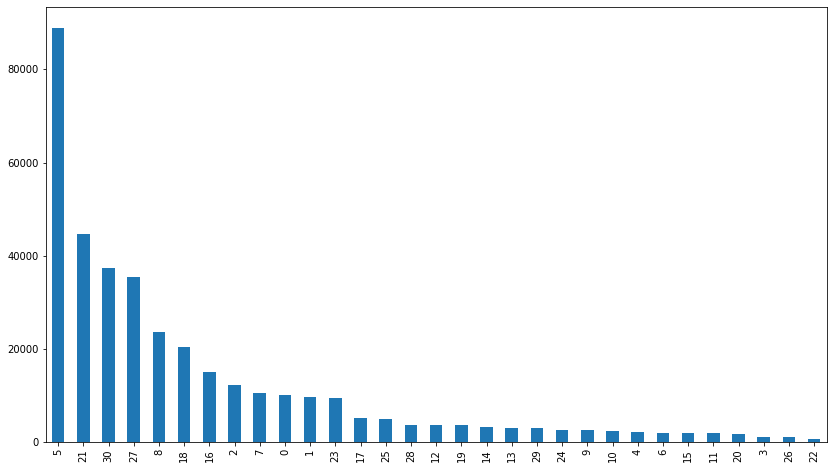

In [13]:
ax = df['Activity_Label'].value_counts().plot(kind='bar',figsize=(14,8))

In [14]:
df

AccelX(g)_leg  AccelY(g)_leg  AccelZ(g)_leg  GyroX(¬∞/s)_leg  \
0           -0.621653       0.469306      -0.509712       -24.017700   
1           -0.621653       0.435859      -0.520333       -26.276036   
2           -0.622751       0.419989      -0.560128       -25.848783   
3           -0.625437       0.418280      -0.545846       -22.064546   
4           -0.621164       0.406073      -0.505074        -9.430076   
...               ...            ...            ...              ...   
367976      -1.160723      -0.046326       0.274479        33.417258   
367977      -1.077592      -0.114809       0.132265        28.168154   
367978      -1.013016      -0.075624      -0.015930        -3.082322   
367979      -0.677317       0.022278      -0.229068       -41.412985   
367980      -0.248234       0.029603      -0.372259       -85.786221   

        GyroY(¬∞/s)_leg  GyroZ(¬∞/s)_leg  AccelX(g)_hand  AccelY(g)_hand  \
0             13.641566       -24.750134       -0.914015       -0.436103   
1             15.899901       -25.665675       -0.884230       -0.441596   
2             16.021973       -24.444953       -0.884352       -0.448432   
3             14.923323       -18.829633       -0.893629       -0.447456   
4             11.810483        -9.430076       -0.881422       -0.404730   
...                 ...              ...             ...             ...   
367976       -35.919738       -34.149691        0.470649        0.293400   
367977       -10.772869       -33.173114        0.466133        0.296574   
367978         4.425116       -37.506676        0.465278        0.314397   
367979        25.909819       -35.553521        0.456123        0.335149   
367980        83.527886       -37.567712        0.458076        0.318181   

        AccelZ(g)_hand  GyroX(¬∞/s)_hand  GyroY(¬∞/s)_hand  GyroZ(¬∞/s)_hand  \
0             0.203189         -7.232776          8.575570         -4.608225   
1             0.183658         -7.598993          8.453498         -4.730297   
2             0.208316         -4.730297          9.185931         -5.401694   
3             0.200626         -3.509575          9.308003         -6.012055   
4             0.189029         -0.457771          9.674220         -6.256199   
...                ...               ...               ...               ...   
367976       -0.783276         53.925383          3.082322        -27.862974   
367977       -0.814771         54.047456          0.030518        -24.628061   
367978       -0.822217         53.864347         -3.326467        -19.562066   
367979       -0.818677         46.540017         -7.354849        -14.190890   
367980       -0.816114         36.224918        -12.420844         -7.965209   

        AccelX(g)_chest  AccelY(g)_chest  AccelZ(g)_chest  Sample(V)  \
0             -0.027771         0.902419        -0.315862  -0.006521   
1             -0.027771         0.902419        -0.315862  -0.006521   
2             -0.027771         0.902419        -0.315862  -0.006521   
3             -0.011170         0.953689        -0.340276  -0.007868   
4             -0.011170         0.953689        -0.340276  -0.007868   
...                 ...              ...              ...        ...   
367976        -0.303166         0.894118         0.033265  -0.010724   
367977        -0.310491         0.842359         0.020081  -0.009413   
367978        -0.310491         0.842359         0.020081  -0.009413   
367979        -0.289982         0.826734        -0.032166  -0.009739   
367980        -0.289982         0.826734        -0.032166  -0.009739   

        Activity_Label  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
367976              14  
367977              14  
367978              14  
367979              14  
367980              14  

[367981 rows x 17 columns]

In [15]:
PredictorCol=['AccelX(g)_leg', 'AccelY(g)_leg', 'AccelZ(g)_leg', 'GyroX(¬∞/s)_leg',
       'GyroY(¬∞/s)_leg', 'GyroZ(¬∞/s)_leg', 'AccelX(g)_hand',
       'AccelY(g)_hand', 'AccelZ(g)_hand', 'GyroX(¬∞/s)_hand',
       'GyroY(¬∞/s)_hand', 'GyroZ(¬∞/s)_hand', 'AccelX(g)_chest',
       'AccelY(g)_chest', 'AccelZ(g)_chest', 'Sample(V)']
TargetCol= 'Activity_Label'

X = df[PredictorCol].values
y = df[TargetCol].values

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1.0, random_state=12)

In [16]:
prediction=RF.predict(X)
from sklearn import metrics
print(metrics.classification_report(y, prediction))
print(metrics.confusion_matrix(y, prediction))

              precision    recall  f1-score   support

           0       0.01      0.00      0.00     10070
           1       0.00      0.00      0.00      9759
           2       0.08      0.02      0.03     12257
           3       0.00      0.00      0.00      1189
           4       0.00      0.01      0.00      2253
           5       0.24      0.20      0.22     88895
           6       0.01      0.07      0.01      2003
           7       0.02      0.02      0.02     10439
           8       0.00      0.00      0.00     23712
           9       0.00      0.00      0.00      2500
          10       0.00      0.00      0.00      2438
          11       0.00      0.03      0.01      1875
          12       0.00      0.00      0.00      3631
          13       0.06      0.04      0.04      3067
          14       0.00      0.07      0.01      3255
          15       0.00      0.00      0.00      1877
          16       0.01      0.03      0.02     14940
          17       0.00    

In [17]:
for i in range(len(y)):
    print("Actual Label: ", y[i], " Predicted Label: ", prediction[i])

Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
from collections import defaultdict
label_counts = defaultdict(int)

for i in range(len(y)):
    actual_label = y[i]
    predicted_label = prediction[i]
    label_counts[f"actual_{actual_label}_predicted_{predicted_label}"] += 1
    print("Actual Label: ", actual_label, " Predicted Label: ", predicted_label)

print("\nLabel Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  7
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  25
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:  14
Actual Label:  1  Predicted Label:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Actual Label:  5  Predicted Label:  20
Actual Label:  5  Predicted Label:  20
Actual Label:  5  Predicted Label:  25
Actual Label:  5  Predicted Label:  32
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  14
Actual Label:  5  Predicted Label:  2
Actual Label:  5  Predicted Label:  27
Actual Label:  5  Predicted Label:  27
Actual Label:  5  Predicted Label:  27
Actual Label:  5  Predicted Label:  25
Actual Label:  5  Predicted Label:  27
Actual Label:  5  Predicted Label:  25
Actual Label:  5  Predicted Label:  6
Actual Label:  5  Predicted Label:  6
Actual Label:  5  Predicted Label:  6
Actual Label:  5  Predicted Label:  27
Actual Label:  5  Predicted Label:  27
Actual Label:  5  Predicted Label:  27
Actual Label:  5  Predicted Label:  27
Actual Label:  5  Predicted Label:  27
Actual Label:  5  Predicted Label:  27
Actual Label:  5  Predicted Label:  16
Actual Label:  5  Predicted Label:  27
Actual Label:  5  Predicted L

In [19]:
from collections import defaultdict
label_counts = defaultdict(int)
total_counts = defaultdict(int)

for i in range(len(y)):
    actual_label = y[i]
    predicted_label = prediction[i]
    label_counts[f"actual_{actual_label}predicted{predicted_label}"] += 1
    total_counts[f"actual_{actual_label}"] += 1
    #print("Actual Label: ", actual_label, " Predicted Label: ", predicted_label)

print("\nLabel Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

print("\nRatios:")
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    print(f"{label} ratio: {count / total_counts[f'actual{actual_label}']}")


Label Counts:
actual_1predicted7: 426
actual_1predicted14: 865
actual_1predicted25: 171
actual_1predicted5: 1464
actual_1predicted4: 1579
actual_1predicted20: 199
actual_1predicted27: 1048
actual_1predicted11: 716
actual_1predicted32: 423
actual_1predicted16: 659
actual_1predicted12: 507
actual_1predicted24: 627
actual_1predicted30: 136
actual_1predicted13: 415
actual_1predicted17: 7
actual_1predicted18: 23
actual_1predicted6: 399
actual_1predicted22: 57
actual_1predicted8: 2
actual_1predicted2: 36
actual_0predicted24: 551
actual_0predicted14: 1255
actual_0predicted13: 408
actual_0predicted5: 1416
actual_0predicted7: 347
actual_0predicted4: 1005
actual_0predicted11: 766
actual_0predicted27: 1226
actual_0predicted16: 623
actual_0predicted25: 234
actual_0predicted32: 398
actual_0predicted12: 946
actual_0predicted22: 23
actual_0predicted6: 345
actual_0predicted30: 222
actual_0predicted20: 237
actual_0predicted2: 21
actual_0predicted8: 4
actual_0predicted17: 2
actual_0predicted18: 2
actua

ZeroDivisionError: division by zero

In [22]:
from collections import defaultdict
label_counts = defaultdict(int)
total_counts = defaultdict(int)

for i in range(len(y)):
    actual_label = y[i]
    predicted_label = prediction[i]
    label_counts[f"actual_{actual_label}_predicted_{predicted_label}"] += 1
    total_counts[f'actual{actual_label}'] += 1

print("\nLabel Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

print("\nRatios:")
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    if f'actual{actual_label}' in total_counts:
        print(f"{label} ratio: {count / total_counts[f'actual{actual_label}']}")
    else:
        print(f"Ratio for {label} cannot be calculated because the actual label count is 0.")



Label Counts:
actual_1_predicted_7: 426
actual_1_predicted_14: 865
actual_1_predicted_25: 171
actual_1_predicted_5: 1464
actual_1_predicted_4: 1579
actual_1_predicted_20: 199
actual_1_predicted_27: 1048
actual_1_predicted_11: 716
actual_1_predicted_32: 423
actual_1_predicted_16: 659
actual_1_predicted_12: 507
actual_1_predicted_24: 627
actual_1_predicted_30: 136
actual_1_predicted_13: 415
actual_1_predicted_17: 7
actual_1_predicted_18: 23
actual_1_predicted_6: 399
actual_1_predicted_22: 57
actual_1_predicted_8: 2
actual_1_predicted_2: 36
actual_0_predicted_24: 551
actual_0_predicted_14: 1255
actual_0_predicted_13: 408
actual_0_predicted_5: 1416
actual_0_predicted_7: 347
actual_0_predicted_4: 1005
actual_0_predicted_11: 766
actual_0_predicted_27: 1226
actual_0_predicted_16: 623
actual_0_predicted_25: 234
actual_0_predicted_32: 398
actual_0_predicted_12: 946
actual_0_predicted_22: 23
actual_0_predicted_6: 345
actual_0_predicted_30: 222
actual_0_predicted_20: 237
actual_0_predicted_2: 21

In [24]:
import pandas as pd

results = []
for label, count in label_counts.items():
    actual_label = label.split("_")[1]
    if f'actual{actual_label}' in total_counts:
        ratio = count / total_counts[f'actual{actual_label}']
        total = total_counts[f'actual{actual_label}']
    else:
        ratio = None
    results.append([label, count,  total,ratio])

df2 = pd.DataFrame(results, columns=["Label", "Count","Total", "Ratio=count/total"])
print(df2)

                      Label  Count  Total  Ratio=count/total
0      actual_1_predicted_7    426   9759           0.043652
1     actual_1_predicted_14    865   9759           0.088636
2     actual_1_predicted_25    171   9759           0.017522
3      actual_1_predicted_5   1464   9759           0.150015
4      actual_1_predicted_4   1579   9759           0.161799
..                      ...    ...    ...                ...
550  actual_14_predicted_20     56   3255           0.017204
551  actual_14_predicted_12      4   3255           0.001229
552  actual_14_predicted_24     44   3255           0.013518
553   actual_14_predicted_7      2   3255           0.000614
554   actual_14_predicted_1      1   3255           0.000307

[555 rows x 4 columns]


In [25]:
pd.options.display.max_rows = None



In [26]:
df2

Label  Count  Total  Ratio=count/total
0      actual_1_predicted_7    426   9759           0.043652
1     actual_1_predicted_14    865   9759           0.088636
2     actual_1_predicted_25    171   9759           0.017522
3      actual_1_predicted_5   1464   9759           0.150015
4      actual_1_predicted_4   1579   9759           0.161799
5     actual_1_predicted_20    199   9759           0.020391
6     actual_1_predicted_27   1048   9759           0.107388
7     actual_1_predicted_11    716   9759           0.073368
8     actual_1_predicted_32    423   9759           0.043345
9     actual_1_predicted_16    659   9759           0.067527
10    actual_1_predicted_12    507   9759           0.051952
11    actual_1_predicted_24    627   9759           0.064248
12    actual_1_predicted_30    136   9759           0.013936
13    actual_1_predicted_13    415   9759           0.042525
14    actual_1_predicted_17      7   9759           0.000717
15    actual_1_predicted_18     23   9759           0.002357
16     actual_1_predicted_6    399   9759           0.040885
17    actual_1_predicted_22     57   9759           0.005841
18     actual_1_predicted_8      2   9759           0.000205
19     actual_1_predicted_2     36   9759           0.003689
20    actual_0_predicted_24    551  10070           0.054717
21    actual_0_predicted_14   1255  10070           0.124628
22    actual_0_predicted_13    408  10070           0.040516
23     actual_0_predicted_5   1416  10070           0.140616
24     actual_0_predicted_7    347  10070           0.034459
25     actual_0_predicted_4   1005  10070           0.099801
26    actual_0_predicted_11    766  10070           0.076068
27    actual_0_predicted_27   1226  10070           0.121748
28    actual_0_predicted_16    623  10070           0.061867
29    actual_0_predicted_25    234  10070           0.023237
30    actual_0_predicted_32    398  10070           0.039523
31    actual_0_predicted_12    946  10070           0.093942
32    actual_0_predicted_22     23  10070           0.002284
33     actual_0_predicted_6    345  10070           0.034260
34    actual_0_predicted_30    222  10070           0.022046
35    actual_0_predicted_20    237  10070           0.023535
36     actual_0_predicted_2     21  10070           0.002085
37     actual_0_predicted_8      4  10070           0.000397
38    actual_0_predicted_17      2  10070           0.000199
39    actual_0_predicted_18      2  10070           0.000199
40    actual_27_predicted_5   8158  35496           0.229829
41   actual_27_predicted_16   3707  35496           0.104434
42    actual_27_predicted_7   1681  35496           0.047357
43   actual_27_predicted_27   4389  35496           0.123648
44   actual_27_predicted_32   2220  35496           0.062542
45    actual_27_predicted_4   1644  35496           0.046315
46   actual_27_predicted_11   1292  35496           0.036398
47   actual_27_predicted_14   4718  35496           0.132916
48    actual_27_predicted_6   2208  35496           0.062204
49   actual_27_predicted_24   1838  35496           0.051780
50   actual_27_predicted_25   1113  35496           0.031356
51   actual_27_predicted_20    890  35496           0.025073
52   actual_27_predicted_12     87  35496           0.002451
53   actual_21_predicted_11   3204  44608           0.071826
54   actual_21_predicted_24   2794  44608           0.062635
55   actual_21_predicted_25   1495  44608           0.033514
56    actual_21_predicted_6   2493  44608           0.055887
57   actual_21_predicted_16   3764  44608           0.084379
58   actual_21_predicted_27   4397  44608           0.098570
59   actual_21_predicted_14   5968  44608           0.133788
60    actual_21_predicted_4   2273  44608           0.050955
61    actual_21_predicted_7   1680  44608           0.037661
62    actual_21_predicted_5   5963  44608           0.133676
63   actual_21_predicted_32   1604  44608           0.035958
64   actual_21_predicted_20   3637  44608           0.081

In [27]:
df2.sort_values(by='Ratio=count/total', ascending=False, inplace=True)


In [30]:
df2.to_csv("RF_results.csv")

In [29]:
df2

Label  Count  Total  Ratio=count/total
363  actual_20_predicted_32   1103   1750           0.630286
348  actual_29_predicted_21   1491   2938           0.507488
431   actual_10_predicted_5   1157   2438           0.474569
528  actual_26_predicted_20    530   1126           0.470693
183   actual_12_predicted_5   1707   3631           0.470118
474  actual_22_predicted_20    306    751           0.407457
333  actual_24_predicted_20   1023   2562           0.399297
455   actual_4_predicted_20    844   2253           0.374612
407    actual_2_predicted_5   3969  12257           0.323815
315   actual_9_predicted_20    783   2500           0.313200
104    actual_8_predicted_5   7305  23712           0.308072
197   actual_30_predicted_5  11228  37291           0.301091
177  actual_13_predicted_26    853   3067           0.278122
276   actual_25_predicted_5   1337   4876           0.274200
516    actual_6_predicted_5    537   2003           0.268098
393    actual_7_predicted_5   2705  10439           0.259124
255   actual_23_predicted_5   2344   9382           0.249840
122  actual_18_predicted_20   5096  20465           0.249011
546  actual_14_predicted_27    785   3255           0.241167
491   actual_3_predicted_20    277   1189           0.232969
40    actual_27_predicted_5   8158  35496           0.229829
481  actual_22_predicted_24    169    751           0.225033
237   actual_19_predicted_5    804   3630           0.221488
379  actual_11_predicted_32    406   1875           0.216533
456   actual_4_predicted_24    482   2253           0.213937
487   actual_3_predicted_14    253   1189           0.212784
79     actual_5_predicted_5  17748  88895           0.199651
215   actual_28_predicted_5    735   3756           0.195687
337  actual_24_predicted_14    467   2562           0.182279
77    actual_5_predicted_27  15408  88895           0.173328
168  actual_13_predicted_14    525   3067           0.171177
504  actual_15_predicted_27    319   1877           0.169952
286  actual_16_predicted_14   2524  14940           0.168942
381  actual_11_predicted_27    314   1875           0.167467
220  actual_28_predicted_14    608   3756           0.161874
4      actual_1_predicted_4   1579   9759           0.161799
250  actual_19_predicted_21    587   3630           0.161708
439   actual_10_predicted_2    391   2438           0.160377
150  actual_17_predicted_14    824   5190           0.158767
335  actual_24_predicted_27    401   2562           0.156518
493   actual_3_predicted_25    186   1189           0.156434
295  actual_16_predicted_12   2325  14940           0.155622
505  actual_15_predicted_14    291   1877           0.155035
108   actual_8_predicted_14   3659  23712           0.154310
322   actual_9_predicted_12    383   2500           0.153200
3      actual_1_predicted_5   1464   9759           0.150015
121  actual_18_predicted_24   3065  20465           0.149768
216  actual_28_predicted_24    558   3756           0.148562
146  actual_17_predicted_27    768   5190           0.147977
159  actual_17_predicted_32    768   5190           0.147977
277  actual_25_predicted_14    700   4876           0.143560
503  actual_15_predicted_16    269   1877           0.143314
151  actual_17_predicted_24    739   5190           0.142389
120  actual_18_predicted_14   2881  20465           0.140777
23     actual_0_predicted_5   1416  10070           0.140616
259  actual_23_predicted_14   1312   9382           0.139842
296  actual_16_predicted_20   2089  14940           0.139826
514   actual_6_predicted_14    279   2003           0.139291
506   actual_15_predicted_5    259   1877           0.137986
270  actual_25_predicted_24    672   4876           0.137818
380  actual_11_predicted_14    252   1875           0.134400
59   actual_21_predicted_14   5968  44608           0.133788
62    actual_21_predicted_5   5963  44608           0.133676
409   actual_2_predicted_27   1636  12257           0.133475
542   actual_14_predicted_6    433   3255           0.133